# Soluções relativas aos execícios da Aula 15

## Exercício 1

Implementar o Método de Newton em alta dimensão

Comecemos com um exemplo simples para encontrarmos o zero da função.

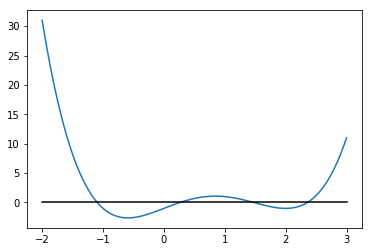

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 3, 100)

f1 = lambda x: x**4 - 3*x**3 + 4*x - 1
df1 = lambda x: 4*x**3 - 9*x**2 + 4

y = f1(x)
zero = np.zeros_like(x)
plt.plot(x, y)
plt.plot(x, zero, c="black")
plt.show()

Prosseguimos implementando o Método de Newton 2D para encontrar algum zero dessa função.

In [2]:
def find_zero2D(init_guess, f, df, it=1000, trace=True):
    if trace:
        guesses = [init_guess]
        for i in range(it):
            guesses.append(guesses[-1] - f(guesses[-1])/df(guesses[-1]))
        return np.array(guesses)
    else:
        next_guess = init_guess
        for i in range(it):
            next_guess = next_guess - f(next_guess)/df(next_guess)
        return next_guess

Experimentemos com três inicializações diferentes para ver para quais zeros de função elas convergem.

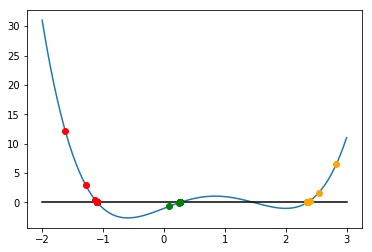

In [3]:
###################################################
np.random.seed(1)
init_guess = np.random.rand(1)*5 - 2
guesses = find_zero2D(init_guess, f1, df1)

plt.plot(x, y, zorder=1)
plt.plot(x, zero, c="black", zorder=2)
plt.scatter(guesses, f1(guesses), c="green", zorder=3)

# plt.show()
###################################################
np.random.seed(4)
init_guess = np.random.rand(1)*5 - 2
guesses = find_zero2D(init_guess, f1, df1)

# plt.plot(x, y, zorder=1)
# plt.plot(x, zero, c="black", zorder=2)
plt.scatter(guesses, f1(guesses), c="orange", zorder=3)

# plt.show()


###################################################
np.random.seed(7)
init_guess = np.random.rand(1)*5 - 2
guesses = find_zero2D(init_guess, f1, df1)

# plt.plot(x, y, zorder=1)
# plt.plot(x, zero, c="black", zorder=2)
plt.scatter(guesses, f1(guesses), c="red", zorder=3)

plt.show()

Podemos obsvervar que dependendo de onde escolhemos o chute inicial, acabamos encontrando um valor diferente de zero de função. Nesse caso, os pontos vermelhos convergem para o zero da esquerda, os verdes para o da esquerda do meio e os laranjas para o da direita.

Seria interessante ter mapeado que pontos levam para que zeros no gráfico todo.

In [4]:
def plot_regions(x, y, f, df):
    x_min, x_max = x.min() - 0.5, x.max() + 0.5
    y_min, y_max = y.min() - 0.5, y.max() + 0.5
    X, Y = np.meshgrid(np.linspace(x_min, x_max, 400), np.linspace(y_min, y_max, 400))
    Z = find_zero2D(X.reshape(-1), f, df, trace=False).reshape(X.shape)
    plt.figure(figsize=(10,8))
    C = plt.contourf(X, Y, Z, zorder=1, cmap=plt.cm.Spectral)
    plt.colorbar(C)
    plt.plot(x, y, c="black", zorder=2)
    plt.plot(x, zero, c="#333333", zorder=3)
    plt.show()

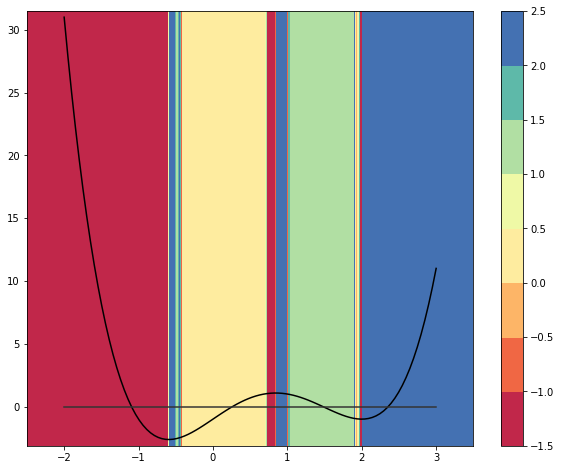

In [5]:
plot_regions(x, y, f1, df1)

Primeiro notamos que as regiões próximoas aos zeros em sua maioria convergem para o zero mais próximo. Entretanto, vemos também que existem pontos, nos quais a derivada é bem próxima de zero, que convergem para outros zeros que não os mais próximos. O que acontece aqui, é que justamente pela proximidade com o zero do coeficiente angular da reta tangente ao ponto, o próximo chute vai para muito longe. Isso torna possível que o chute acabe entrando na "_zona de atração_" de outro zero de função.

É interessante notar, também que nessa função, poucos pontos divergiram. Isso é devido a natureza do polinômio escolhido. Se olharmos de longe para essa função, percebemos que ela se comporta quase como uma parábola de concavidade para cima. Dessa forma, os chutes, por mais longe que eventualmente sejam, eventualmente voltam para o meio da função, caindo em uma zona de atração e convergindo para algum zero da função.

Os únicos pontos que divergiram - estão próximos ao 1 e 2 - foram os cuja divisão da iteração foram por zero. Isso ocorreu, pois o coeficiente angular das retas tangentes à curva naquele ponto eram tão baixos que foram numericamente arredondados para zero em memória.

Tomemos agora o exemplo de uma função $f: \mathbb{R}^2 \to \mathbb{R}^2$

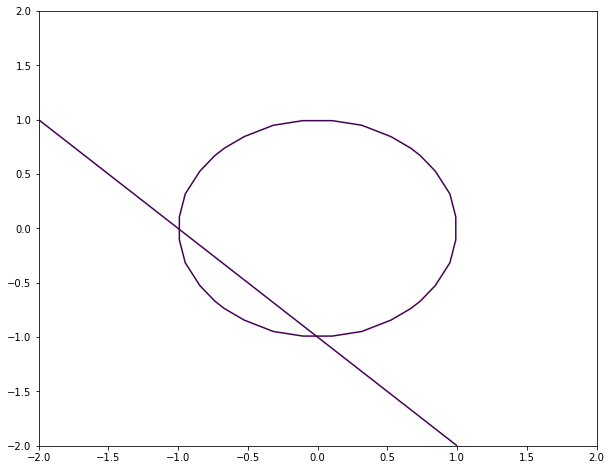

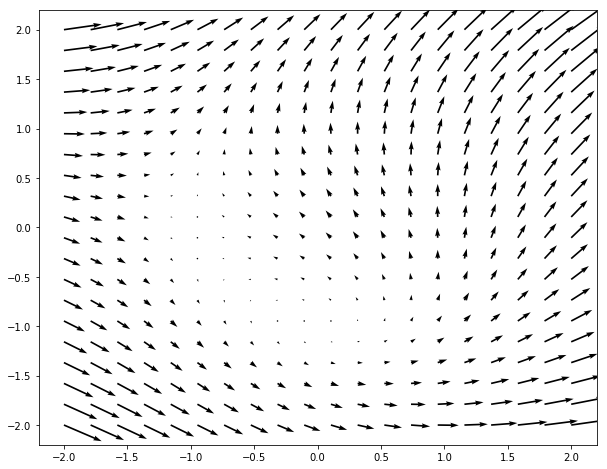

In [6]:
x2 = np.linspace(-2, 2, 20)
y2 = np.linspace(-2, 2, 20)
X2, Y2 = np.meshgrid(x2, y2)
z1 = X2**2 + Y2**2 - 1
z2 = X2 + Y2 + 1

f2 = lambda x: np.array([x[0]**2 + x[1]**2 - 1, x[0] + x[1] + 1])

plt.figure(figsize=(10,8))
plt.contour(X2, Y2, z1, [0])
plt.contour(X2, Y2, z2, [0])
plt.show()

plt.figure(figsize=(10,8))
plt.quiver(x2, y2, z1, z2)
plt.show()

Para calcular o Método de Newton, agora precisamos alterar um pouco a função.

In [7]:
jac_f2 = lambda x: np.array([[2*x[0], 2*x[1]], [1, 1]])

In [19]:
def find_zero(init_guess, f, jac_f, it=1000, trace=True):
    if trace:
        guesses = [init_guess]
        for i in range(it):
            if(np.allclose(f(guesses[-1]), 0)):
                break
            guesses.append(np.linalg.solve(jac_f(guesses[-1]), -f(guesses[-1])) + guesses[-1])            
        return np.array(guesses)
    else:
        next_guess = init_guess
        for i in range(it):
            next_guess = np.linalg.solve(jac_f(next_guess), -f(next_guess)) + next_guess
        return next_guess

In [9]:
# f2 = lambda x: np.array([x[0]**2, x[1]**2])
# jac_f2 = lambda x: np.array([[2*x[0], 0], [0, 2*x[1]]])
# z1 = X2**2
# z2 = Y2**2

[[  3.85616809e-02   7.80100461e-01]
 [ -2.13761218e+00   1.13761218e+00]
 [ -1.39513674e+00   3.95136738e-01]
 [ -1.08721184e+00   8.72118388e-02]
 [ -1.00647629e+00   6.47628703e-03]
 [ -1.00004141e+00   4.14059796e-05]
 [ -1.00000000e+00   1.71431316e-09]]
7


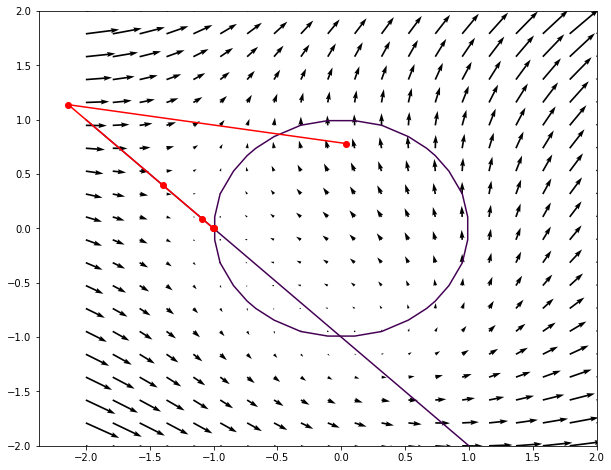

In [10]:
np.random.seed(34)
init_guess = np.random.rand(2)
guesses = find_zero(init_guess, f2, jac_f2)
print(guesses)
print(len(guesses))

plt.figure(figsize=(10,8))
plt.quiver(x2, y2, z1, z2, zorder=1)
plt.plot(guesses[:,0], guesses[:,1], c="red", zorder=2)
plt.scatter(guesses[:,0], guesses[:,1], c="red", zorder=3)
plt.contour(X2, Y2, z1, [0])
plt.contour(X2, Y2, z2, [0])
plt.show()

In [32]:
def plot_regions2D(x, y, f, df):
    x_min, x_max = X2.min() - 0.5, X2.max() + 0.5
    y_min, y_max = Y2.min() - 0.5, Y2.max() + 0.5
    X, Y = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = []
    for i in range(X.shape[0]):
        Z.append([])
        for j in range(X.shape[1]):
            try:
                sol_zero = find_zero(np.array([X[i][j], Y[i][j]]), f, df, trace=False)
            except:
                sol_zero = [0,0]
            Z[i].append((sol_zero[0]*100 + sol_zero[1])/100)
    Z = np.array(Z)
    print(Z.shape)
    plt.figure(figsize=(10,8))
    C = plt.contourf(X, Y, Z, zorder=1, cmap=plt.cm.Spectral)
    plt.colorbar(C)
    plt.contour(X2, Y2, z1, [0])
    plt.contour(X2, Y2, z2, [0])
    plt.show()
    plt.figure(figsize=(10,8))
    C = plt.contourf(X, Y, Z, zorder=1, cmap=plt.cm.Spectral)
    plt.colorbar(C)
    plt.quiver(x2, y2, z1, z2, zorder=1)
    plt.contour(X2, Y2, z1, [0])
    plt.contour(X2, Y2, z2, [0])
    plt.show()

(100, 100)


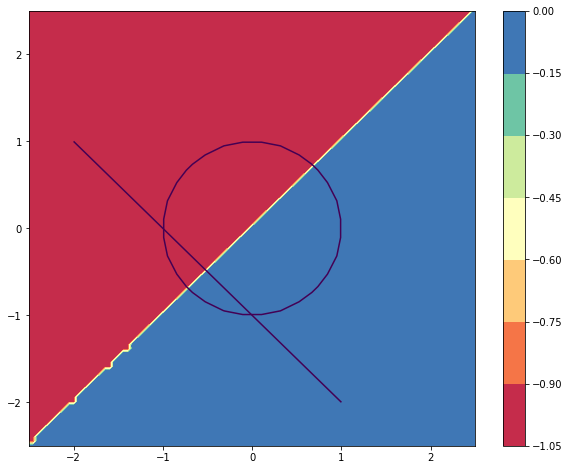

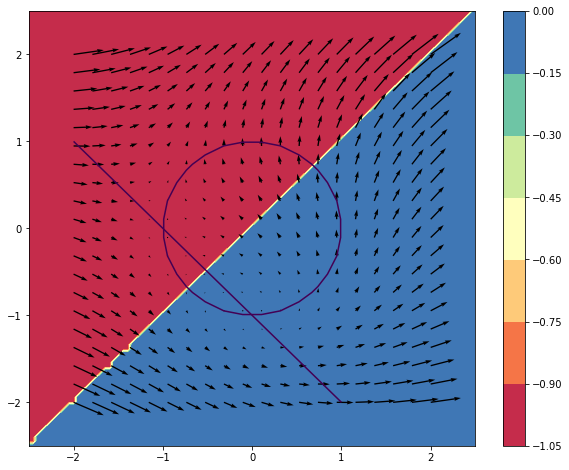

In [33]:
plot_regions2D(x2, y2, f2, jac_f2)

In [22]:
def f3(x):
    f = [x[0]-1]
    for i in range(x.shape[0]-1):
        f.append((x[i]*x[i+1])-i-1)
    return np.array(f)

def jac_f3(x):
    jac = np.zeros([x.shape[0], x.shape[0]])
    jac[0][0] = 1
    jac[1][1] = x[0]
    jac[-1][-2] = x[-1]
    for i in range(1, x.shape[0]-1):
        jac[i][i-1] = x[i]
        jac[i+1][i+1] = x[i]
    return jac


np.random.seed(34)
init_guess = np.random.rand(100)
# print('Init guess: ', init_guess)
# print('Function: ', f3(init_guess))
# print('Jacobian: ', jac_f3(init_guess))

zero = find_zero(init_guess, f3, jac_f3, trace = False)
print('Zero: ', zero)

zero:  [  1.           1.           2.           1.5          2.66666667   1.875
   3.2          2.1875       3.65714286   2.4609375    4.06349206
   2.70703125   4.43290043   2.93261719   4.77389277   3.14208984
   5.09215229   3.33847046   5.39169066   3.52394104   5.67546386
   3.70013809   5.94572404   3.86832619   6.20423378   4.02950644
   6.45240313   4.18448746   6.69138102   4.33393344   6.9221183
   4.47839789   7.14541244   4.61834783   7.36194009   4.75418158
   7.57228123   4.88624218   7.77693748   5.0148275    7.97634614
   5.14019819   8.17089117   5.26258386   8.36091189   5.38218804
   8.54670993   5.49919213   8.72855482   5.61375863   8.9066886
   5.72603381   9.08132955   5.83614984   9.25267539   5.94422669
   9.42090585   6.05037359   9.5861849    6.15469038   9.74866261
   6.25726855   9.90847675   6.35819224  10.06575416   6.45753899
  10.22061192   6.55538049  10.37315836   6.65178315  10.52349399
   6.74680862  10.67171222   6.8405143   10.81790006   6.932953